#RADICAL-Pilot on Blue Waters
Mark Santcroos <mark.santcroos@rutgers.edu>

# Start of code

In [764]:
import pandas as pd
import pprint
import os
from radical.pilot import utils as rpu
import radical.utils as ru
import numpy as np
import matplotlib as mp

In [958]:
# 'Magic' commands
%matplotlib inline
#%pylab inline
format='png' # pdf, png, svg
%config InlineBackend.figure_formats=[format]
#mp.style.use('fivethirtyeight')
mp.style.use('ggplot')

#Colormap possible values are: 
#Spectral, summer, coolwarm, Wistia_r, pink_r, Set1, Set2, Set3, brg_r, Dark2, prism, PuOr_r, afmhot_r, 
#terrain_r, PuBuGn_r, RdPu, gist_ncar_r, gist_yarg_r, Dark2_r, YlGnBu, RdYlBu, hot_r, gist_rainbow_r, 
#gist_stern, PuBu_r, cool_r, cool, gray, copper_r, Greens_r, GnBu, gist_ncar, spring_r, gist_rainbow, 
#gist_heat_r, Wistia, OrRd_r, CMRmap, bone, gist_stern_r, RdYlGn, Pastel2_r, spring, terrain, YlOrRd_r, 
#Set2_r, winter_r, PuBu, RdGy_r, spectral, rainbow, flag_r, jet_r, RdPu_r, gist_yarg, BuGn, Paired_r, 
#hsv_r, bwr, cubehelix, Greens, PRGn, gist_heat, spectral_r, Paired, hsv, Oranges_r, prism_r, Pastel2, 
#Pastel1_r, Pastel1, gray_r, jet, Spectral_r, gnuplot2_r, gist_earth, YlGnBu_r, copper, gist_earth_r, 
#Set3_r, OrRd, gnuplot_r, ocean_r, brg, gnuplot2, PuRd_r, bone_r, BuPu, Oranges, RdYlGn_r, PiYG,
#CMRmap_r, YlGn, binary_r, gist_gray_r, Accent, BuPu_r, gist_gray, flag, bwr_r, RdBu_r, BrBG, Reds, 
#Set1_r, summer_r, GnBu_r, BrBG_r, Reds_r, RdGy, PuRd, Accent_r, Blues, autumn_r, autumn, cubehelix_r, 
#nipy_spectral_r, ocean, PRGn_r, Greys_r, pink, binary, winter, gnuplot, RdYlBu_r, hot, YlOrBr, 
#coolwarm_r, rainbow_r, Purples_r, PiYG_r, YlGn_r, Blues_r, YlOrBr_r, seismic, Purples, seismic_r, RdBu, 
#Greys, BuGn_r, YlOrRd, PuOr, PuBuGn, nipy_spectral, afmhot

# Input definitions

In [3]:
#
# exp1 with 3 iterations
#
exp1 = {
    'rp.session.netbook.mark.016591.0006': {
        'pilot_cores': 256,
        'cu_cores': 1,
        'profiling': True,
        'cu_count': 512,
        'cu_runtime': 0,
        'number_of_workers': 1,
        'pilot_runtime': 30,
        'iteration': 2,
        'backend': 'ORTE'
    },
    'rp.session.netbook.mark.016591.0007': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 1, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0004': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 300, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0005': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 600, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0002': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0003': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 120, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0000': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 10, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0001': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 30, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0008': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 10, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0009': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 30, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1002': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 1, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1003': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 10, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1001': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1006': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 120, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1007': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 300, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1004': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 30, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1005': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1008': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 600, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1009': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.1010': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 1, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0011': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 120, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0010': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0013': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 600, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0012': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 300, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}}
','.join(exp1.keys())

'rp.session.netbook.mark.016591.0006,rp.session.netbook.mark.016591.0007,rp.session.netbook.mark.016591.0004,rp.session.netbook.mark.016591.0005,rp.session.netbook.mark.016591.0002,rp.session.netbook.mark.016591.0003,rp.session.netbook.mark.016591.0000,rp.session.netbook.mark.016591.0001,rp.session.netbook.mark.016591.0008,rp.session.netbook.mark.016591.0009,rp.session.netbook.mark.016590.1002,rp.session.netbook.mark.016590.1003,rp.session.netbook.mark.016590.1001,rp.session.netbook.mark.016590.1006,rp.session.netbook.mark.016590.1007,rp.session.netbook.mark.016590.1004,rp.session.netbook.mark.016590.1005,rp.session.netbook.mark.016590.1008,rp.session.netbook.mark.016590.1009,rp.session.netbook.mark.016590.1010,rp.session.netbook.mark.016591.0011,rp.session.netbook.mark.016591.0010,rp.session.netbook.mark.016591.0013,rp.session.netbook.mark.016591.0012'

In [4]:
#
# exp2 with 3 iterations
#
exp2 = {
    'rp.session.netbook.mark.016590.0025': {
        'pilot_cores': 256,
        'cu_cores': 128,
        'profiling': True,
        'cu_count': 8,
        'cu_runtime': 60,
        'number_of_workers': 1,
        'pilot_runtime': 30,
        'iteration': 2,
        'backend': 'ORTE'
    },
    'rp.session.netbook.mark.016590.0024': {'pilot_cores': 256, 'cu_cores': 64, 'profiling': True, 'cu_count': 16, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0018': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 1024, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0019': {'pilot_cores': 256, 'cu_cores': 2, 'profiling': True, 'cu_count': 512, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0012': {'pilot_cores': 256, 'cu_cores': 8, 'profiling': True, 'cu_count': 128, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0013': {'pilot_cores': 256, 'cu_cores': 16, 'profiling': True, 'cu_count': 64, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0010': {'pilot_cores': 256, 'cu_cores': 2, 'profiling': True, 'cu_count': 512, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0011': {'pilot_cores': 256, 'cu_cores': 4, 'profiling': True, 'cu_count': 256, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0016': {'pilot_cores': 256, 'cu_cores': 128, 'profiling': True, 'cu_count': 8, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0017': {'pilot_cores': 256, 'cu_cores': 256, 'profiling': True, 'cu_count': 4, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0014': {'pilot_cores': 256, 'cu_cores': 32, 'profiling': True, 'cu_count': 32, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0015': {'pilot_cores': 256, 'cu_cores': 64, 'profiling': True, 'cu_count': 16, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0005': {'pilot_cores': 256, 'cu_cores': 32, 'profiling': True, 'cu_count': 32, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0004': {'pilot_cores': 256, 'cu_cores': 16, 'profiling': True, 'cu_count': 64, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0021': {'pilot_cores': 256, 'cu_cores': 8, 'profiling': True, 'cu_count': 128, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0020': {'pilot_cores': 256, 'cu_cores': 4, 'profiling': True, 'cu_count': 256, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0001': {'pilot_cores': 256, 'cu_cores': 2, 'profiling': True, 'cu_count': 512, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0000': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 1024, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0003': {'pilot_cores': 256, 'cu_cores': 8, 'profiling': True, 'cu_count': 128, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0002': {'pilot_cores': 256, 'cu_cores': 4, 'profiling': True, 'cu_count': 256, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0009': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 1024, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0008': {'pilot_cores': 256, 'cu_cores': 256, 'profiling': True, 'cu_count': 4, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0023': {'pilot_cores': 256, 'cu_cores': 32, 'profiling': True, 'cu_count': 32, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0022': {'pilot_cores': 256, 'cu_cores': 16, 'profiling': True, 'cu_count': 64, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0007': {'pilot_cores': 256, 'cu_cores': 128, 'profiling': True, 'cu_count': 8, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0006': {'pilot_cores': 256, 'cu_cores': 64, 'profiling': True, 'cu_count': 16, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016590.0026': {'pilot_cores': 256, 'cu_cores': 256, 'profiling': True, 'cu_count': 4, 'cu_runtime': 60, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}}
#pprint.pprint(exp2)
','.join(exp2.keys())

'rp.session.netbook.mark.016590.0025,rp.session.netbook.mark.016590.0024,rp.session.netbook.mark.016590.0018,rp.session.netbook.mark.016590.0019,rp.session.netbook.mark.016590.0012,rp.session.netbook.mark.016590.0013,rp.session.netbook.mark.016590.0010,rp.session.netbook.mark.016590.0011,rp.session.netbook.mark.016590.0016,rp.session.netbook.mark.016590.0017,rp.session.netbook.mark.016590.0014,rp.session.netbook.mark.016590.0015,rp.session.netbook.mark.016590.0005,rp.session.netbook.mark.016590.0004,rp.session.netbook.mark.016590.0021,rp.session.netbook.mark.016590.0020,rp.session.netbook.mark.016590.0001,rp.session.netbook.mark.016590.0000,rp.session.netbook.mark.016590.0003,rp.session.netbook.mark.016590.0002,rp.session.netbook.mark.016590.0009,rp.session.netbook.mark.016590.0008,rp.session.netbook.mark.016590.0023,rp.session.netbook.mark.016590.0022,rp.session.netbook.mark.016590.0007,rp.session.netbook.mark.016590.0006,rp.session.netbook.mark.016590.0026'

In [5]:
#
# exp3 with 3 iterations
#
exp3 = {
    'rp.session.netbook.mark.016591.0028': {
        'pilot_cores': 256,
        'cu_cores': 1,
        'profiling': True,
        'cu_count': 512,
        'cu_runtime': 0,
        'number_of_workers': 7,
        'pilot_runtime': 30,
        'iteration': 1,
        'backend': 'ORTE'},
    'rp.session.netbook.mark.016591.0029': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 8, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0024': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 3, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0025': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 4, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0026': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 5, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0027': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 6, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0020': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 7, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0021': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 8, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0022': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0023': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 2, 'pilot_runtime': 30, 'iteration': 1, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0015': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 2, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0014': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0017': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 4, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0016': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 3, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0019': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 6, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0018': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 5, 'pilot_runtime': 30, 'iteration': 0, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0037': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 8, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0036': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 7, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0035': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 6, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0034': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 5, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0033': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 4, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0032': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 3, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0031': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 2, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}, 'rp.session.netbook.mark.016591.0030': {'pilot_cores': 256, 'cu_cores': 1, 'profiling': True, 'cu_count': 512, 'cu_runtime': 0, 'number_of_workers': 1, 'pilot_runtime': 30, 'iteration': 2, 'backend': 'ORTE'}}
#pprint.pprint(exp3)
','.join(exp3.keys())

'rp.session.netbook.mark.016591.0028,rp.session.netbook.mark.016591.0029,rp.session.netbook.mark.016591.0024,rp.session.netbook.mark.016591.0025,rp.session.netbook.mark.016591.0026,rp.session.netbook.mark.016591.0027,rp.session.netbook.mark.016591.0020,rp.session.netbook.mark.016591.0021,rp.session.netbook.mark.016591.0022,rp.session.netbook.mark.016591.0023,rp.session.netbook.mark.016591.0015,rp.session.netbook.mark.016591.0014,rp.session.netbook.mark.016591.0017,rp.session.netbook.mark.016591.0016,rp.session.netbook.mark.016591.0019,rp.session.netbook.mark.016591.0018,rp.session.netbook.mark.016591.0037,rp.session.netbook.mark.016591.0036,rp.session.netbook.mark.016591.0035,rp.session.netbook.mark.016591.0034,rp.session.netbook.mark.016591.0033,rp.session.netbook.mark.016591.0032,rp.session.netbook.mark.016591.0031,rp.session.netbook.mark.016591.0030'

In [6]:
experiments = [exp1, exp2, exp3]

# Instructions on fetching profiling data
```bash
radicalpilot-stats -m prof -p /Users/mark/Documents/experiments/bluewaters/data/profiling/ -s <session[,session[,session]]>
```

In [7]:
#
# Function for extracting a selection of experiments from the experiment repo
#
def select_exp_from_repo(repo, filter={}):
    exp_ids = []
    for exp_name, exp_config in repo.iteritems():
        match = True
        for filter_key, filter_val in filter.iteritems():
            if filter_val != exp_config[filter_key]:
                match = False
                break
        if match:
            exp_ids.append(exp_name)
    return exp_ids

def _test_get_experiments():
    print select_exp_from_repo(exp3, {
#         'cu_cores': 1,
#         'cu_count': 500,
#         'nodes': 10,
#         'exec_workers': 1,
#         'spawner': 'shell',
#         'launcher': 'orte'
    })
    
#_test_get_experiments()

In [8]:
#
# Turn ID into a name that can be used as a python identifier.
#
def normalize_id(sid):
    return sid.replace('.', '_')

In [9]:
#
# Write session into HDF5 store
#
def stat_session(store, db, cachedir, session_id):

    session_frame, pilot_frame, unit_frame = rpu.get_session_frames(db, session_id, cachedir)

    norm_session_id = normalize_id(session_id)

    store.put('%s/session' % norm_session_id, session_frame)
    store.put('%s/pilots' % norm_session_id, pilot_frame)
    store.put('%s/units' % norm_session_id, unit_frame)

In [10]:
#
# MongoDB URL
#
import radical.utils as ru
dburl = ru.Url(os.environ['RADICAL_PILOT_DBURL'])
#dburl = ru.Url('mongodb://ec2-54-221-194-147.compute-1.amazonaws.com:24242/')

if not dburl.path or '/' == dburl.path:
    dburl.path = 'radicalpilot'

print 'Using MongoDB at: %s' % dburl

Using MongoDB at: mongodb://ec2-54-221-194-147.compute-1.amazonaws.com:24242/mark/


In [11]:
#
# Location to store raw json session data
#
cachedir = '/Users/mark/Documents/experiments/bluewaters/data/json'

if not os.path.isdir(cachedir):
    raise("No valid cache dir: %s" % cachedir)

In [12]:
#
# Location where raw profiling data is stored
#
profdir = '/Users/mark/Documents/experiments/bluewaters/data/profiling'

# Data Structure
Data is stored as:
- SESSIONID/config
- SESSIONID/session
- SESSIONID/pilots
- SESSIONID/units
- SESSIONID/prof

In [13]:
#
# Store JSON session data in HDF5 database
#
# TODO: prevent duplication
# TODO: Look into performance degradation warning
#
hdf5dir = '/Users/mark/Documents/experiments/bluewaters/data/hdf5'

store = pd.HDFStore(os.path.join(hdf5dir, 'store.h5'))
mongo, db, dbname, cname, pname = ru.mongodb_connect(dburl)


for exp in experiments:
    
    for session_id in select_exp_from_repo(exp):
    
        stat_session(store, db, cachedir, session_id)

#store.close()
mongo.disconnect()

/Users/mark/.virtualenv/rp/lib/python2.7/site-packages/pandas/io/pytables.py:2559: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['Done', 'Failed', 'pid', 'resource', 'sid']]

  warnings.warn(ws, PerformanceWarning)
/Users/mark/.virtualenv/rp/lib/python2.7/site-packages/pandas/io/pytables.py:2559: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['Canceled', 'Failed', 'PendingInputStaging', 'StagingInput', 'Unscheduled', 'pid', 'sid', 'slots', 'uid']]

  warnings.warn(ws, PerformanceWarning)


In [14]:
session_names = [r._v_name for r in store.root]
#session_names = list(set([x.split('/', 2)[1] for x in store.keys()]))
session_names

['rp_session_netbook_mark_016590_0000',
 'rp_session_netbook_mark_016590_0001',
 'rp_session_netbook_mark_016590_0002',
 'rp_session_netbook_mark_016590_0003',
 'rp_session_netbook_mark_016590_0004',
 'rp_session_netbook_mark_016590_0005',
 'rp_session_netbook_mark_016590_0006',
 'rp_session_netbook_mark_016590_0007',
 'rp_session_netbook_mark_016590_0008',
 'rp_session_netbook_mark_016590_0009',
 'rp_session_netbook_mark_016590_0010',
 'rp_session_netbook_mark_016590_0011',
 'rp_session_netbook_mark_016590_0012',
 'rp_session_netbook_mark_016590_0013',
 'rp_session_netbook_mark_016590_0014',
 'rp_session_netbook_mark_016590_0015',
 'rp_session_netbook_mark_016590_0016',
 'rp_session_netbook_mark_016590_0017',
 'rp_session_netbook_mark_016590_0018',
 'rp_session_netbook_mark_016590_0019',
 'rp_session_netbook_mark_016590_0020',
 'rp_session_netbook_mark_016590_0021',
 'rp_session_netbook_mark_016590_0022',
 'rp_session_netbook_mark_016590_0023',
 'rp_session_netbook_mark_016590_0024',


In [15]:
sessions = [store['%s/session' % s_name] for s_name in session_names]

# Read Agent Profiling Data

In [16]:
#
# Transpose raw DF into a CU oriented datastructure
# TODO: This needs to be converted to a DF straight away
#
def prof2uids(rawdf):
    units = {}
    
    # Using "native" Python    
    #units[exp]['all'] = [x for x in df.uid[df.uid > 0].unique() if x.startswith('unit')]
    units['all'] = [x for x in rawdf.uid.dropna().unique() if x.startswith('unit')]
    units['cloned']= [x for x in units['all'] if 'clone' in x]
    units['real'] = list(set(units['all']) - set(units['cloned']))
    
    # Or alternatively, with Pandas
    #uids_s = df['uid']
    #all_units_s = uids_s.loc[uids_s.str.startswith('unit.', na=False)].drop_duplicates()
    #units[exp]['all'] = set(all_units_s)
    #cloned_units_s = all_units_s.loc[all_units_s.str.contains('clone')]
    #units[exp]['cloned'] = set(cloned_units_s)
    #units[exp]['real'] = units[exp]['all'] - units[exp]['cloned']
    
    return units

# for exp, u in units.iteritems():
#     print "Experiment:'%s', all:'%d', real:'%d', cloned:'%d'" % \
#         (exp, len(u['all']), len(u['real']), len(u['cloned']))

#Event Translation Table
This table is semi-manually crafted.

In [17]:
# "label", "component", "event", "message"
elements = [
    ('a_get_u',         'MainThread',       'get', 'MongoDB to Agent (PendingExecution)'),
    ('a_build_u',       'MainThread',       'Agent get unit meta', ''),
    ('a_mkdir_u',       'MainThread',       'Agent get unit mkdir', ''),
    ('a_notify_alloc',  'MainThread',       'put', 'Agent to update_queue (Allocating)'),
    ('a_to_s',          'MainThread',       'put', 'Agent to schedule_queue (Allocating)'),

    ('s_get_alloc',     'CONTINUOUS',       'get', 'schedule_queue to Scheduler (Allocating)'),
    ('s_alloc_failed',  'CONTINUOUS',       'schedule', 'allocation failed'),
    ('s_allocated',     'CONTINUOUS',       'schedule', 'allocated'),
    ('s_to_ewo',        'CONTINUOUS',       'put', 'Scheduler to execution_queue (Allocating)'),
    ('s_unqueue',       'CONTINUOUS',       'unqueue', 're-allocation done'),
    
    ('ewo_get',         'ExecWorker-',      'get', 'executing_queue to ExecutionWorker (Executing)'),
    ('ewo_launch',      'ExecWorker-',      'ExecWorker unit launch', ''),
    ('ewo_spawn',       'ExecWorker-',      'ExecWorker spawn', ''),
    ('ewo_script',      'ExecWorker-',      'launch script constructed', ''),
    ('ewo_pty',         'ExecWorker-',      'spawning passed to pty', ''),  
    ('ewo_notify_exec', 'ExecWorker-',      'put', 'ExecWorker to update_queue (Executing)'),
    ('ewo_to_ewa',      'ExecWorker-',      'put', 'ExecWorker to watcher (Executing)'),
    
    ('ewa_get',         'ExecWatcher-',     'get', 'ExecWatcher picked up unit'),
    ('ewa_complete',    'ExecWatcher-',     'execution complete', ''),
    ('ewa_notify_so',   'ExecWatcher-',     'put', 'ExecWatcher to update_queue (StagingOutput)'),
    ('ewa_to_sow',      'ExecWatcher-',     'put', 'ExecWatcher to stageout_queue (StagingOutput)'),
    
    ('sow_get_u',       'StageoutWorker-',  'get', 'stageout_queue to StageoutWorker (StagingOutput)'),
    ('sow_u_done',      'StageoutWorker-',  'final', 'stageout done'),
    ('sow_notify_done', 'StageoutWorker-',  'put', 'StageoutWorker to update_queue (Done)'),

    ('uw_get_alloc',    'UpdateWorker-',    'get', 'update_queue to UpdateWorker (Allocating)'),   
    ('uw_push_alloc',   'UpdateWorker-',    'unit update pushed (Allocating)', ''),
    ('uw_get_exec',     'UpdateWorker-',    'get', 'update_queue to UpdateWorker (Executing)'),
    ('uw_push_exec',    'UpdateWorker-',    'unit update pushed (Executing)', ''),
    ('uw_get_so',       'UpdateWorker-',    'get', 'update_queue to UpdateWorker (StagingOutput)'),
    ('uw_push_so',      'UpdateWorker-',    'unit update pushed (StagingOutput)', ''),
    ('uw_get_done',     'UpdateWorker-',    'get', 'update_queue to UpdateWorker (Done)'),
    ('uw_push_done',    'UpdateWorker-',    'unit update pushed (Done)', '')
]
print "Number of entries: %d" % len(elements)
[e[0] for e in elements]
#edf = pd.DataFrame(elements, columns=["label", "component", "event", "message"])

Number of entries: 32


['a_get_u',
 'a_build_u',
 'a_mkdir_u',
 'a_notify_alloc',
 'a_to_s',
 's_get_alloc',
 's_alloc_failed',
 's_allocated',
 's_to_ewo',
 's_unqueue',
 'ewo_get',
 'ewo_launch',
 'ewo_spawn',
 'ewo_script',
 'ewo_pty',
 'ewo_notify_exec',
 'ewo_to_ewa',
 'ewa_get',
 'ewa_complete',
 'ewa_notify_so',
 'ewa_to_sow',
 'sow_get_u',
 'sow_u_done',
 'sow_notify_done',
 'uw_get_alloc',
 'uw_push_alloc',
 'uw_get_exec',
 'uw_push_exec',
 'uw_get_so',
 'uw_push_so',
 'uw_get_done',
 'uw_push_done']

In [18]:
#
# Lookup tuples in dataframe based on uid and the tuple from the elements list
#
def tup2ts(df, uid, tup):
    #print uid
    #print tup
    all_for_uid = df[df.uid == uid].fillna('')
    val = all_for_uid[(all_for_uid.component.str.startswith(tup[1])) &
                      (all_for_uid.event == tup[2]) &
                      (all_for_uid.message == tup[3])].time
    try:
        return val.iloc[0]
    except Exception as e:
        return np.NaN

In [19]:
#
# Construct a unit based dataframe from a raw dataframe
#
def prof2df(rawdf, units): 
    # TODO: create skip logic
    #if exp in indices and exp in info:
    #    continue
    
    indices = [unit for unit in units['real']] 
    info = [{t[0]:tup2ts(rawdf, unit, t) for t in elements} for unit in units['real']]
    
    # TODO: Also do this for cloned units

    return pd.DataFrame(info) # , index=indices[exp]).sort_index()

In [539]:
#
# Method to create a column based on two other columns using an operator
#
import operator

def create_column(df, lhs, rhs, operator):
    return operator(df[lhs], df[rhs])

In [540]:
#
# Add additional (derived) colums to dataframes
# 
def add_derived(df):
    df['executor_queue'] = create_column(df, 'ewo_get', 's_to_ewo', operator.sub)
    df['raw_runtime'] = create_column(df, 'ewa_complete', 'ewo_launch', operator.sub)
    df['full_runtime'] = create_column(df, 'uw_push_done', 's_to_ewo', operator.sub)
    df['watch_delay'] = create_column(df, 'ewa_get', 'ewo_to_ewa', operator.sub)
    df['allocation'] = create_column(df, 's_allocated', 'a_to_s', operator.sub)

In [20]:
for exp in experiments:
    #
    # Get raw CSV datasets as DataFrames based on selection filter
    #
    session_ids = select_exp_from_repo(
        exp,
        {
        #   'cu_cores': 128,
        #   'cu_count': 500,
        #    'nodes': 10,
        #    'exec_workers': 1,
        #   'spawner': 'shell',
        #   'launcher': 'orte'
        }
    )

    for sid in session_ids:

        norm_sid = normalize_id(sid)

        # Get multiple pilots from session
        for pid in store.get('%s/pilots' % norm_sid)['pid']:
            prof_file = os.path.join(profdir, sid + '-' + pid + '.prof')
            #print prof_file

            raw_prof_data = pd.read_csv(prof_file)
            #print raw_prof_data

            units = prof2uids(raw_prof_data)

            df = prof2df(raw_prof_data, units)

            store.put('%s/prof/%s' % (norm_sid, normalize_id(pid)), df)

In [365]:
store.get('rp_session_netbook_mark_016590_0007/prof/pilot_0007')

,a_build_u,a_get_u,a_mkdir_u,a_notify_alloc,a_to_s,ewa_complete,ewa_get,ewa_notify_so,ewa_to_sow,ewo_get,...,sow_notify_done,sow_u_done,uw_get_alloc,uw_get_done,uw_get_exec,uw_get_so,uw_push_alloc,uw_push_done,uw_push_exec,uw_push_so
0,356.4712,356.4712,356.4722,356.4723,356.4724,605.4103,605.4099,605.4103,605.4104,544.4139,...,605.4151,605.4150,356.5395,605.4285,544.6920,605.4283,357.4744,605.5613,545.5218,605.5613
1,356.4411,356.4410,356.4534,356.4534,356.4543,483.3959,483.3955,483.3959,483.3963,421.7370,...,483.4013,483.4012,356.5389,483.5158,422.0411,483.4863,357.4743,484.5464,422.4751,483.5157
2,356.4368,356.4368,356.4387,356.4387,356.4391,482.3959,482.3955,482.3960,482.3960,421.4035,...,482.4017,482.4016,356.5387,482.4843,421.7403,482.4591,357.4743,483.5156,422.4751,482.4842
3,356.4563,356.4563,356.4579,356.4580,356.4595,543.4025,543.4022,543.4026,543.4027,482.4065,...,543.4085,543.4084,356.5390,543.4600,482.6849,543.4348,357.4743,544.4913,483.5156,543.4599
4,356.4688,356.4687,356.4698,356.4699,356.4700,604.4102,604.4099,604.4103,604.4105,543.4129,...,604.4156,604.4156,356.5393,604.5269,543.7607,604.5015,357.4744,605.5613,544.4913,604.5267
5,356.4088,356.4087,356.4225,356.4225,356.4233,421.3888,421.3884,421.3888,421.3892,359.2221,...,421.3966,421.3966,356.4369,421.4395,359.5782,421.4142,357.4743,422.4751,359.6034,421.4392
6,356.4631,356.4631,356.4661,356.4662,356.4663,544.4027,544.4023,544.4027,544.4028,483.4063,...,544.4099,544.4099,356.5392,544.4915,483.7164,544.4619,357.4744,545.5217,484.5464,544.4914
7,356.4334,356.4333,356.4349,356.4350,356.4352,421.3944,421.3934,421.3945,421.3948,359.5195,...,421.3997,421.3996,356.4382,421.4397,359.8038,421.4393,357.4743,422.4751,360.6298,422.4750


#Comparison of launch methods (inactive)

In [ ]:
orte0 = store.get('rp.session.netbook.mark.016525.0027/units')
aprun0 = store.get('rp.session.netbook.mark.016525.0028/units')
ccm0 = store.get('rp.session.netbook.mark.016525.0030/units')

In [ ]:
orte0_ttc = max(orte0['Done']) - min(orte0['Executing'])
ccm0_ttc = max(ccm0['Done']) - min(ccm0['Executing'])
aprun0_ttc = max(aprun0['Done']) - min(aprun0['Executing'])
#df = pandas.DataFrame([aprun0_ttc, ccm0_ttc, orte0_ttc], ['aprun', 'ccm', 'orte'])
#df = pandas.DataFrame([[1,2,3]])
df = pd.DataFrame([{'APRUN': aprun0_ttc, 'CCM/SSH': ccm0_ttc, 'ORTE': orte0_ttc}])
ax = df.plot(kind='bar', )
ax.set_ylabel("TTC (s)")
#ax.set_xlabel('Method')
ax.set_title("Time to Completion (TTC)\n10 nodes, 100 x 32 core \"sleep 0\" tasks.\n")
#grid('off')
ax.set_xticklabels("")
ax.set_ylim(0,70)
#savefig('ttc.pdf')

In [ ]:
orte0['Runtime'] = orte0['Done'] - orte0['Executing']
aprun0['Runtime'] = aprun0['Done'] - aprun0['Executing']
ccm0['Runtime'] = ccm0['Done'] - ccm0['Executing']

In [ ]:
ax = aprun0['Runtime'].plot(kind='hist', title='APRUN, 10 nodes, 320 cores, 100x sleep 0, 32 cores')
ax.set_ylabel('Occurences')
ax.set_xlabel('Runtime (s)')

In [ ]:
ax = ccm0['Runtime'].plot(kind='hist', title='CCM/SSH, 10 nodes, 320 cores, 100x sleep 0, 32 cores')
ax.set_ylabel('Occurences')
ax.set_xlabel('Runtime (s)')

In [ ]:
ax = orte0['Runtime'].plot(kind='hist', title='ORTE, 10 nodes, 320 cores, 100x sleep 0, 32 cores')
ax.set_ylabel('Occurences')
ax.set_xlabel('Runtime (s)')

#Analysis of Experiment 1
 Variable CU duration (0, 1, 10, 30, 60, 120, 300, 600)
- Fixed backend (ORTE)
- Fixed CU count (512)
- Fixed CU cores (1)
- CU = /bin/sleep
- Fixed Pilot cores (256)

Goal: investigate the relative overhead of ORTE in relation to the runtime of the CU

        0         1         10        30        60        120       300  \
0  136.4542  140.2559  147.8989  172.8814  204.1623  315.4501  676.4756   
1  132.9021  134.9368  152.0105  172.0627  204.5040  315.2822  675.3129   
2  135.1392  140.1903  147.0005  167.9725  209.3945  316.9143  676.0551   

         600  
0  1277.3247  
1  1276.3665  
2  1279.1753  


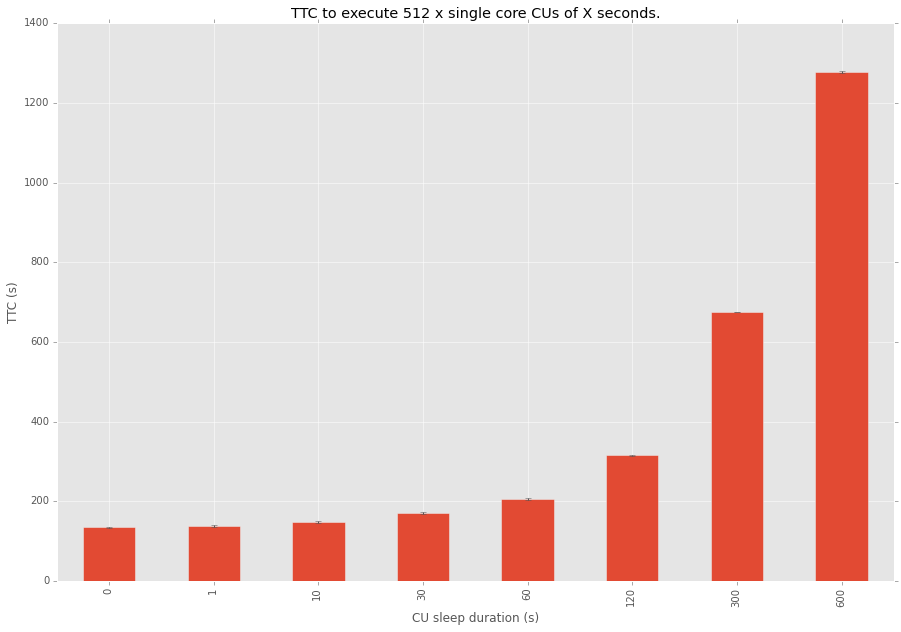

In [963]:
#
# Calculate TTC
#
cu_runtime = [0, 1, 10, 30, 60, 120, 300, 600]
#cu_runtime = [60]
orte_ids = {}
orte_ttc = {}
orte_execq = {}

for runtime in cu_runtime:

    orte_ids[runtime] = select_exp_from_repo(
        exp1,
        {
            'cu_runtime': runtime
        }
    )
    
    orte_ttc[runtime] = []
    orte_execq[runtime] = []
    for sid in orte_ids[runtime]:

        norm_sid = normalize_id(sid)
                  
        # Get multiple pilots from session
        for pid in store.get('%s/pilots' % norm_sid)['pid']:
            df = store.get('/%s/prof/%s' % (norm_sid, normalize_id(pid)))
            
            # TTC
            orte_ttc[runtime].append(df['ewa_complete'].max() - df['a_to_s'].min())

orte_df = pd.DataFrame(orte_ttc)
stddev = orte_df.std()

print orte_df
ax = orte_df.mean().plot(kind='bar', yerr=stddev, figsize=(15,10))
ax.set_ylabel('TTC (s)')
ax.set_xlabel('CU sleep duration (s)')
ax.set_title('TTC to execute 512 x single core CUs of X seconds.')

In [491]:
#
# Calculate TTC, split up
#
cu_runtime = [0, 1, 10, 30, 60, 120, 300, 600]
#cu_runtime = [60]
orte_ids = {}
orte_ttc = pd.DataFrame()
orte_optimal = pd.DataFrame()

for runtime in cu_runtime:

    orte_ids[runtime] = select_exp_from_repo(
        exp1,
        {
            'cu_runtime': runtime
        }
    )
    
    #orte_ttc[runtime] = []
    orte_execq[runtime] = []
    for sid in orte_ids[runtime]:

        norm_sid = normalize_id(sid)
                  
        # Get multiple pilots from session
        for pid in store.get('%s/pilots' % norm_sid)['pid']:
            df = store.get('/%s/prof/%s' % (norm_sid, normalize_id(pid)))
            
            # TTC
            #orte_ttc[runtime].append(df['ewa_complete'].max() - df['a_to_s'].min())
            dft = df['ewa_complete'] - df['a_to_s']
            if cores in orte_ttc:
                orte_ttc[runtime] = pd.concat([orte_ttc[runtime], dft], ignore_index=True)
            else:
                    orte_ttc[runtime] = dft
                    
orte_optimal[runtime] = pd.Series(cu_runtime)

print orte_ttc.max()
print orte_optimal

# orte_df = pd.DataFrame()
# orte_df['ttc'] = orte_ttc.max()
# orte_df['optimal'] = orte_optimal


# stddev = orte_df.std()

# print orte_df
# x = orte_df.plot(kind='bar', yerr=stddev)
# # ax.set_ylabel('TTC (s)')
# # ax.set_xlabel('CU sleep duration (s)')
# ax.set_title('TTC to execute 512 x single core CUs of X seconds.')

0       133.6047
1       138.6459
10      145.5278
30      166.4867
60      207.8334
120     315.4003
300     674.5043
600    1277.6377
dtype: float64
   600
0    0
1    1
2   10
3   30
4   60
5  120
6  300
7  600


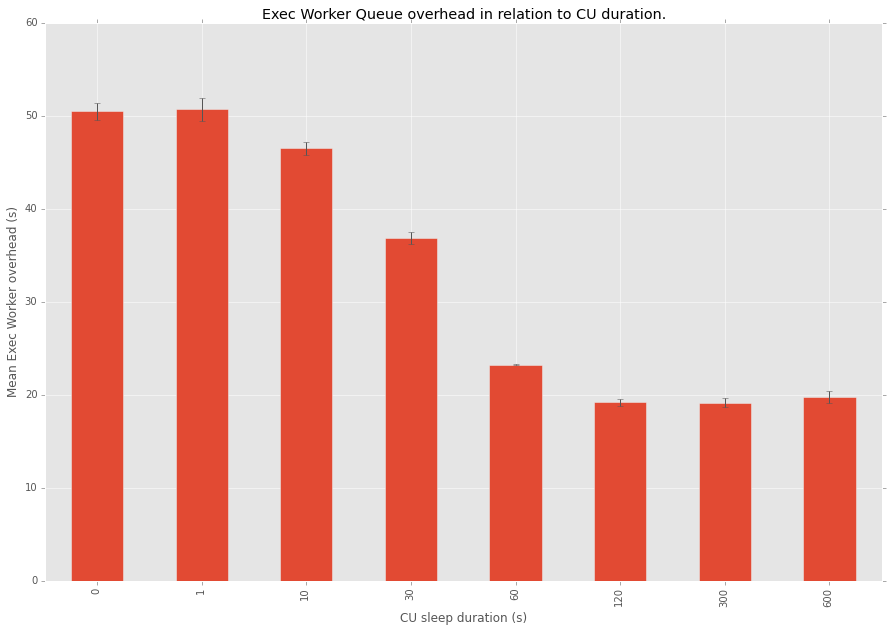

In [964]:
#
# Calculate Exec Queue overhead
#
cu_runtime = [0, 1, 10, 30, 60, 120, 300, 600]
#cu_runtime = [60]
orte_ids = {}
orte_ttc = {}
orte_execq = {}

for runtime in cu_runtime:

    orte_ids[runtime] = select_exp_from_repo(
        exp1,
        {
            'cu_runtime': runtime
        }
    )
    
    orte_ttc[runtime] = []
    orte_execq[runtime] = []
    for sid in orte_ids[runtime]:

        norm_sid = normalize_id(sid)
                  
        # Get multiple pilots from session
        for pid in store.get('%s/pilots' % norm_sid)['pid']:
            df = store.get('/%s/prof/%s' % (norm_sid, normalize_id(pid)))
            
            # Exec Queue time
            orte_execq[runtime].append((df['ewo_get'] - df['s_to_ewo']).mean())
            
orte_df = pd.DataFrame(orte_execq)
stddev = orte_df.std()

ax = orte_df.mean().plot(kind='bar', yerr=stddev, figsize=(15,10))
#ax.set_ylim(200, 400)
ax.set_ylabel('Mean Exec Worker overhead (s)')
ax.set_xlabel('CU sleep duration (s)')
ax.set_title('Exec Worker Queue overhead in relation to CU duration.')

# Analysis of Experiment 2
- Fixed CU duration (60)
- Fixed backend (ORTE)
- Variable CU count (4-1024)
- Variable CU cores (1-256)
- CU = /bin/sleep
- Fixed Pilot cores (256)

Goal: Investigate the relative overhead of small tasks compared to larger tasks

In [385]:
# #
# # Gather the data and plot the individual values
# #
# cu_cores = [1, 2, 4, 8, 16, 32, 64, 128, 256]
# orte_ids = {}
# orte_df = {}

# for cores in cu_cores:

#     orte_ids[cores] = select_exp_from_repo(exp2, {'cu_cores': cores})
#     orte_df[cores] = pd.DataFrame()
#     for sid in orte_ids[cores]:
#         orte_df[cores] = orte_df[cores].append(store.get('/%s/units' % normalize_id(sid)))        
#         orte_df[cores]['Runtime'] = orte_df[cores]['Done'] - orte_df[cores]['Executing']
    
#     orte_df[cores]['Runtime'].plot(title='ORTE Task Launching on Blue Waters\n'
#                      'number of tasks = (total cores / cores per task) * 4')
    
# #savefig("launchtimes.png")

In [495]:
#
# Plot the mean+stddev launch times for various core counts (using json data)
#
means = pd.DataFrame()
std = pd.DataFrame()
for cores in cu_cores:
    means[cores] = pd.Series(orte_df[cores]['Runtime'].mean())
    std[cores] = pd.Series(orte_df[cores]['Runtime'].std())
ax = means.plot(kind='bar', yerr=std, title='ORTE Task Launching on Blue Waters')
ax.set_xticklabels("")
ax.set_xlabel('Number of cores')
ax.set_ylabel('Mean task launch times (s)')

KeyError: 'Runtime'

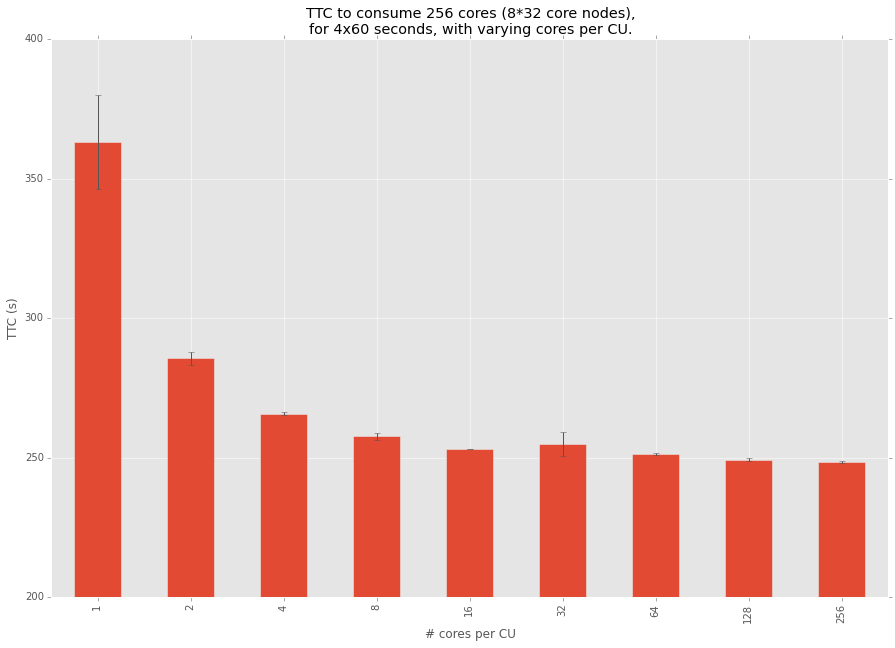

In [965]:
#
# Calculate TTC
#
cu_cores = [1, 2, 4, 8, 16, 32, 64, 128, 256]
#cu_cores = [64]
orte_ids = {}
orte_ttc = {}

for cores in cu_cores:

    orte_ids[cores] = select_exp_from_repo(
        exp2,
        {
            'cu_cores': cores
        }
    )
    
    orte_ttc[cores] = []
    for sid in orte_ids[cores]:

        norm_sid = normalize_id(sid)
                  
        # Get multiple pilots from session
        for pid in store.get('%s/pilots' % norm_sid)['pid']:
            df = store.get('/%s/prof/%s' % (norm_sid, normalize_id(pid)))
            
            orte_ttc[cores].append(df['ewa_complete'].max() - df['a_to_s'].min())

orte_df = pd.DataFrame(orte_ttc)

stddev = orte_df.std()
ax = orte_df.mean().plot(kind='bar', yerr=stddev, figsize=(15,10))
ax.set_ylim(200, 400)
ax.set_ylabel('TTC (s)')
ax.set_xlabel('# cores per CU')
ax.set_title('TTC to consume 256 cores (8*32 core nodes),\nfor 4x60 seconds, with varying cores per CU.')

       Running  Exec Queue
1    61.154008   23.897681
2    61.063203    6.004300
4    61.047129    3.142352
8    61.098076    2.324327
16   61.254286    1.423102
32   61.484012    1.395966
64   61.511169    0.952831
128  61.342813    0.742338
256  61.534825    0.681575


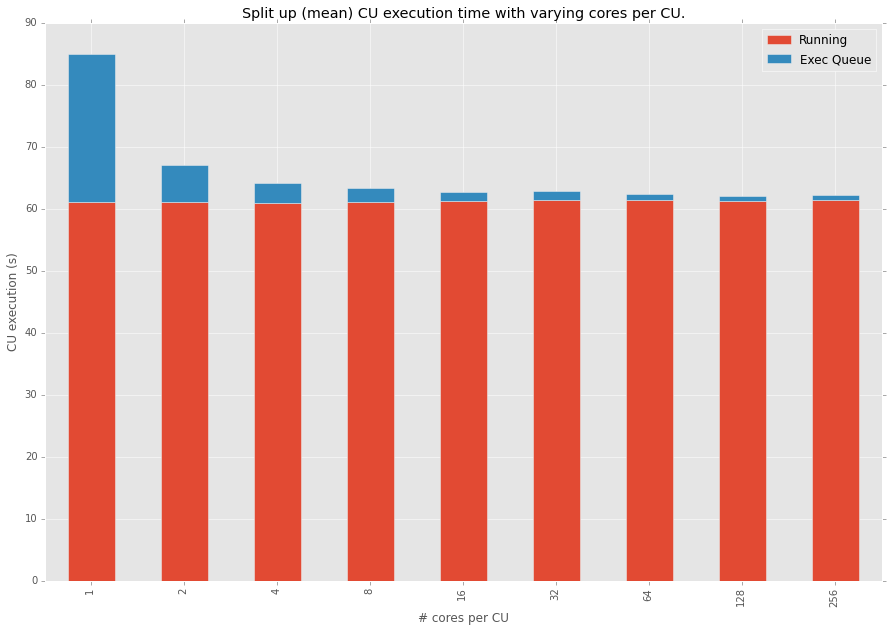

In [966]:
#
# Calculate TTC, split up
#
cu_cores = [1, 2, 4, 8, 16, 32, 64, 128, 256]
orte_ids = {}
orte_run = pd.DataFrame()
orte_alloc = pd.DataFrame()
orte_execq = pd.DataFrame()
orte_total = pd.DataFrame()

for cores in cu_cores:

    orte_ids[cores] = select_exp_from_repo(
        exp2,
        {
            'cu_cores': cores,
            'iteration': 1
        }
    )
    
    for sid in orte_ids[cores]:

        norm_sid = normalize_id(sid)
                  
        # Get multiple pilots from session
        for pid in store.get('%s/pilots' % norm_sid)['pid']:
            df = store.get('/%s/prof/%s' % (norm_sid, normalize_id(pid)))
                
            dfr = df['ewa_complete'] - df['ewo_launch']
            if cores in orte_run:
                orte_run[cores] = pd.concat([orte_run[cores], dfr], ignore_index=True)
            else:
                    orte_run[cores] = dfr

            dfq = df['ewo_get'] - df['s_to_ewo']
            if cores in orte_execq:
                orte_execq[cores] = pd.concat([orte_execq[cores], dfq], ignore_index=True)
            else:
                    orte_execq[cores] = dfq
            
orte_df = pd.DataFrame()

orte_df['Running'] = orte_run.mean()
orte_df['Exec Queue'] = orte_execq.mean()

print orte_df
ax = orte_df.plot(kind='bar', stacked=True, figsize=(15,10))

#ax.set_ylim(50, 90)
ax.set_ylabel('CU execution (s)')
ax.set_xlabel('# cores per CU')
ax.set_title('Split up (mean) CU execution time with varying cores per CU.')

In [ ]:
#
# TODO: Extract launch rate
#

# for exp, df in unit_datasets.iteritems():
#     #points = df.columns
#     #points = ['a_to_s']
#     ttc = df['ewa_complete'].max() - df['a_to_s'].min()
#     avg = ttc/500
#     print "Experiment: %s - ExecWorkers: %d - TTC: %d(s) - Rate: %f(exections/s) " % (exp, experiments[exp]['exec_workers'], ttc, 1/avg)

#Analysis of Experiment 3
- Fixed CU duration (0s)
- Fixed backend (ORTE)
- Fixed CU count (512)
- Fixed CU cores (1)
- CU = /bin/sleep
- Fixed Pilot cores (256)
- Variable number of exec workers (1-8)

Goal: Investigate the effect of number of exec workers

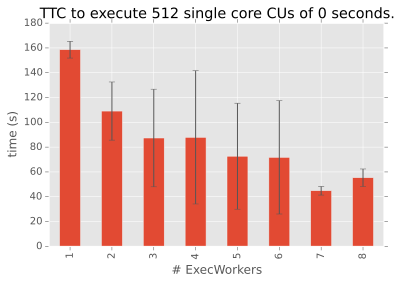

In [947]:
#
# Calculate TTC
#
num_workers = range(1,9)
orte_ids = {}
orte_ttc = {}
orte_execq = {}

for workers in num_workers:

    orte_ids[workers] = select_exp_from_repo(
        exp3,
        {
            'number_of_workers': workers
        }
    )
    
    orte_ttc[workers] = []
    orte_execq[workers] = []
    for sid in orte_ids[workers]:

        norm_sid = normalize_id(sid)
                  
        # Get multiple pilots from session
        for pid in store.get('%s/pilots' % norm_sid)['pid']:
            df = store.get('/%s/prof/%s' % (norm_sid, normalize_id(pid)))
            
            # TTC
            orte_ttc[workers].append(df['ewa_complete'].max() - df['a_to_s'].min())

orte_df = pd.DataFrame(orte_ttc)
stddev = orte_df.std()

ax = orte_df.mean().plot(kind='bar', yerr=stddev)
ax.set_title('TTC to execute 512 single core CUs of 0 seconds.')
ax.set_ylabel('time (s)')
ax.set_xlabel('# ExecWorkers')


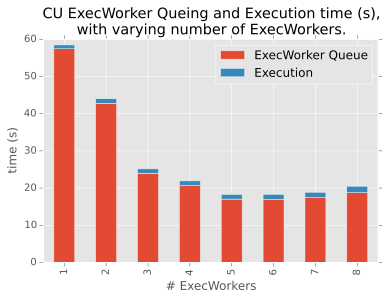

In [937]:
#
# Calculate TTC, split up
#
num_workers = range(1,9)
orte_ids = {}
orte_run = pd.DataFrame()
orte_execq = pd.DataFrame()

for workers in num_workers:

    orte_ids[workers] = select_exp_from_repo(
        exp3,
        {
            'number_of_workers': workers,
        }
    )
    
    for sid in orte_ids[workers]:

        norm_sid = normalize_id(sid)
                  
        # Get multiple pilots from session
        for pid in store.get('%s/pilots' % norm_sid)['pid']:
            df = store.get('/%s/prof/%s' % (norm_sid, normalize_id(pid)))
                
            dfr = df['ewa_complete'] - df['ewo_launch']
            if workers in orte_run:
                orte_run[workers] = pd.concat([orte_run[workers], dfr], ignore_index=True)
            else:
                    orte_run[workers] = dfr

            dfq = df['ewo_get'] - df['s_to_ewo']
            if workers in orte_execq:
                orte_execq[workers] = pd.concat([orte_execq[workers], dfq], ignore_index=True)
            else:
                    orte_execq[workers] = dfq
            
orte_df = pd.DataFrame()

orte_df['ExecWorker Queue'] = orte_execq.mean()
orte_df['Execution'] = orte_run.mean()

ax = orte_df.plot(kind='bar', stacked=True)

ax.set_title('CU ExecWorker Queing and Execution time (s),\nwith varying number of ExecWorkers.')
ax.set_ylabel('time (s)')
ax.set_xlabel('# ExecWorkers')

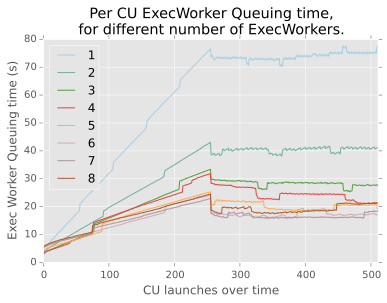

In [919]:
#
# Plot ExecWorker Queuing Delay, for varying number of ExecWorkers, with launches shown over time.
#
num_workers = range(1,9)
orte_ids = {}
orte_execq = pd.DataFrame()

for workers in num_workers:

    orte_ids[workers] = select_exp_from_repo(
        exp3,
        {
            'number_of_workers': workers,
            'iteration': 2 # Only one as these values are difficult to combine
        }
    )
    
    for sid in orte_ids[workers]:

        norm_sid = normalize_id(sid)
                  
        # Get multiple pilots from session
        for pid in store.get('%s/pilots' % norm_sid)['pid']:
            df = store.get('/%s/prof/%s' % (norm_sid, normalize_id(pid)))

            df['execq'] = df['ewo_get'] - df['s_to_ewo']
 
            dfq = pd.Series(df.sort('s_to_ewo')['execq'])
            dfq.index = range(512)
            orte_execq[workers] = dfq

ax = orte_execq.plot(colormap='Paired')
ax.set_title('Per CU ExecWorker Queuing time,\nfor different number of ExecWorkers.')
ax.set_ylabel('Exec Worker Queuing time (s)')
ax.set_xlabel('CU launches over time')

#Parking Place

In [892]:
#
# Plot to illustrate the scalability of adding more exec workers
#
points = [
    'a_get_u',
#    'a_build_u',
#    'a_mkdir_u',
#    'a_notify_alloc',
#    'a_to_s',
#    's_get_alloc',
#    's_alloc_failed',
    's_allocated',
#    's_to_ewo',
#    's_unqueue',
    'ewo_get',
#    'ewo_launch',
#    'ewo_spawn',
#    'ewo_script',
 #   'ewo_pty',
#    'ewo_notify_exec',
#    'ewo_to_ewa',
#    'ewa_get',
    'ewa_complete',
#    'ewa_notify_so',
#    'ewa_to_sow',
#    'sow_get_u',
#    'sow_u_done',
#    'sow_notify_done',
#    'uw_get_alloc',
#    'uw_push_alloc',
#    'uw_get_exec',
#    'uw_push_exec',
#    'uw_get_so',
#    'uw_push_so',
#    'uw_get_done',
#   'uw_push_done'
][::-1] # reverse, so that legend matches the stack

#sort_key = 'ewa_complete'
#conf = experiments[exp]
#ax = df.sort(sort_key)[points].mean().plot(kind='line')
#ax.set_ylabel("Time since Agent Start (s)")
#ax.set_title('Run ID: %s\nStatic - #Nodes:%d, #Cores_per_CU:%d, #CUs:%d\nVariable - #ExecWorkers:%d' % (
#        exp, 8, 64, 42, 1))
#ax.legend(['Done', 'Launched', 'Scheduled', 'Init'])

In [ ]:
#
# TODO: Not used anymore?!?
#
# Convert the lists generated by the cell above into tuples
# TODO: Similar as above, this step needs to become obsolete
#
#subsets = {}
#tuples = {}
#for exp in exp_ids:
#    df = raw_datasets[exp]
#    subsets[exp] = df[df.uid == units[exp]['real'][0]][['component', 'event', 'message']]
#    tuples[exp] = list(subsets[exp].to_records(index=False))
#    
#    print "Experiment:%s, subsets:%d, tuples:%d" % (exp, len(subsets[exp]), len(tuples[exp]))

In [ ]:
#
# Get ordered list of events for one CU ordered on a certain field
#
#unit_datasets['500cu_1core_10node_1ew'].sort('ewo_get').loc['unit.000370'].order()
def print_unit_ordered_list(exp_id, unit_id, order_key):
    print unit_datasets[exp_id].sort(order_key).loc[unit_id].order()

#print_unit_ordered_list('500cu_1core_10node_1ew', 'unit.000370',  'ewo_get')

In [893]:
sort_key = 'ewa_complete' # Agent becomes aware of the unit for the first time
df1 = pd.DataFrame()
for exp, df in unit_datasets.iteritems():
    df['experiment'] = exp
    df1 = df1 + df
    print df1.tail()
    #conf = experiments[exp]
    #ax = df.sort(sort_key)[points].plot(kind='line', ylim=(60,210))
    #ax.set_ylabel("Time since Agent Start (s)")
    #ax.set_title('Run ID: %s\nStatic - #Nodes:%d, #Cores_per_CU:%d, #CUs:%d\nVariable - #ExecWorkers:%d' % (
    #        exp, conf['nodes'], conf['cu_cores'], conf['cu_count'], conf['exec_workers']))
    #ax.legend(['Done', 'Launched', 'Scheduled', 'Init'])

NameError: name 'unit_datasets' is not defined